In [1]:
import os
import multiprocessing
multiprocessing.cpu_count()

16

In [2]:
# Reference: https://mxnet.apache.org/versions/1.9.1/api/faq/env_var

# os.environ["MXNET_CPU_WORKER_NTHREADS"] = "1"
# os.environ["MXNET_CPU_PRIORITY_NTHREADS"] = "1"
# os.environ["MXNET_CPU_NNPACK_NTHREADS"] = "1"
# os.environ["MXNET_EXEC_NUM_TEMP"] = "1"
# os.environ["MXNET_ENGINE_TYPE"] = "NaiveEngine"

# Default Mode: "ThreadedEnginePerDevice"
# os.environ["MXNET_CPU_WORKER_NTHREADS"] = "4"
# os.environ["MXNET_CPU_PRIORITY_NTHREADS"] = "4"
# os.environ["MXNET_CPU_NNPACK_NTHREADS"] = "4"
# os.environ["MXNET_EXEC_NUM_TEMP"] = "4"
# os.environ["MXNET_ENGINE_TYPE"] = "ThreadedEnginePerDevice"

In [3]:
from importlib import reload
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet.contrib import amp
import time
import timeit
from tqdm.notebook import tqdm

ctx = mx.cpu()

## Creation of Matrices

In [4]:
wait_for_operations = True

start_time = time.time()

for _ in tqdm(range(100)):
    a = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        a.wait_to_read()
    b = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        b.wait_to_read()
    c = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        c.wait_to_read()
    d = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        d.wait_to_read()


print("Time (s):", time.time() - start_time)

  0%|          | 0/100 [00:00<?, ?it/s]

[19:54:31] /work/mxnet/src/engine/engine.cc:54: MXNet start using engine: ThreadedEnginePerDevice


Time (s): 10.879605054855347


In [5]:
wait_for_operations = False
compute_results = False

start_time = time.time()

for _ in tqdm(range(100)):
    a = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        a.wait_to_read()
    b = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        b.wait_to_read()
    c = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        c.wait_to_read()
    d = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        d.wait_to_read()

    if compute_results:
        a.wait_to_read()
        b.wait_to_read()
        c.wait_to_read()
        d.wait_to_read()
        
print("Time (s):", time.time() - start_time)

  0%|          | 0/100 [00:00<?, ?it/s]

Time (s): 0.042786598205566406


In [6]:
wait_for_operations = False
compute_results = True

start_time = time.time()

for _ in tqdm(range(100)):
    a = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        a.wait_to_read()
    b = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        b.wait_to_read()
    c = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        c.wait_to_read()
    d = mx.nd.random.normal(shape=(1000, 1000))
    if wait_for_operations:
        d.wait_to_read()

    if compute_results:
        a.wait_to_read()
        b.wait_to_read()
        c.wait_to_read()
        d.wait_to_read()
        
print("Time (s):", time.time() - start_time)

  0%|          | 0/100 [00:00<?, ?it/s]

Time (s): 19.67207169532776


## Multiplication of Matrices

In [7]:
wait_for_operations = True
compute_results = False

start_time = time.time()

for _ in tqdm(range(10)):
    a = mx.nd.random.normal(shape=(10000, 10000))
    if wait_for_operations:
        a.wait_to_read()
    b = mx.nd.random.normal(shape=(10000, 10000))
    if wait_for_operations:
        b.wait_to_read()
    c = mx.nd.random.normal(shape=(10000, 10000))
    if wait_for_operations:
        c.wait_to_read()
    d = mx.nd.random.normal(shape=(10000, 10000))
    if wait_for_operations:
        d.wait_to_read()

    s1 = a * a * a * a * b * b * b * b
    if wait_for_operations:
        s1.wait_to_read()
    s2 = c * c * c * c * d * d * d * d
    if wait_for_operations:
        s2.wait_to_read()
    s1 = s1 * s1 * s1 * s1 * s1 * s1 * s1 * s1
    if wait_for_operations:
        s1.wait_to_read()
    s2 = s2 * s2 * s2 * s2 * s2 * s2 * s2 * s2
    if wait_for_operations:
        s2.wait_to_read()
    s_total = s1 * s2
    s_total = s_total * s_total * s_total * s_total
    if wait_for_operations:
        s_total.wait_to_read()
        
    if compute_results:
        s_total.wait_to_read()
        
print("Time (s):", time.time() - start_time)

  0%|          | 0/10 [00:00<?, ?it/s]

Time (s): 135.26983547210693


In [8]:
start_time = time.time()

s_total = []

for _ in tqdm(range(10)):
    a = mx.nd.random.normal(shape=(10000, 10000))
    b = mx.nd.random.normal(shape=(10000, 10000))
    c = mx.nd.random.normal(shape=(10000, 10000))
    d = mx.nd.random.normal(shape=(10000, 10000))

    s1 = a * a * a * a * b * b * b * b
    s2 = c * c * c * c * d * d * d * d
    s1 = s1 * s1 * s1 * s1 * s1 * s1 * s1 * s1 
    s2 = s2 * s2 * s2 * s2 * s2 * s2 * s2 * s2
    s_total = s1 * s2
    s_total = s_total * s_total * s_total * s_total

mx.nd.waitall()
        
print("Time (s):", time.time() - start_time)

  0%|          | 0/10 [00:00<?, ?it/s]

Time (s): 111.36750531196594


## DataLoaders

In [4]:
import gluoncv as gcv

# ADE20K Preliminary steps
# Needs source code from Gluon-CV, run (in your desired code folder):
# gh repo clone dmlc/gluon-cv
# in the gluon-cv/scripts/datasets folder, there is a script called
# ade20k.py, run it with:
# !python3 ade20k.py 

In [6]:
# All in CPU, no transforms
ade20k_val = gcv.data.ADE20KSegmentation(split='val')

data_shape = []
labels_shape = []

start_time = time.time()

for data, label in tqdm(ade20k_val):
    data_shape.append(data.shape)
    labels_shape.append(label.shape)
    
print("Time (s):", time.time() - start_time)

  0%|          | 0/2000 [00:00<?, ?it/s]

Time (s): 20.51421332359314


In [7]:
image_size = 1200

input_transform_fn = mx.gluon.data.vision.transforms.Compose([
    mx.gluon.data.vision.transforms.Resize(image_size, keep_ratio=True),
    mx.gluon.data.vision.transforms.CenterCrop(image_size),
    mx.gluon.data.vision.transforms.ToTensor(),
    mx.gluon.data.vision.transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])

to_gpu_fn = lambda x: x.as_in_context(mx.gpu())

input_transform_fn_gpu = mx.gluon.data.vision.transforms.Compose([
    to_gpu_fn,
    input_transform_fn
])

In [8]:
# Pre-processing in CPU, with transforms
ade20k_val_cpu = gcv.data.ADE20KSegmentation(split='val', transform=input_transform_fn)

data_shape = []
labels_shape = []

start_time = time.time()

for data, label in tqdm(ade20k_val_cpu):
    data_shape.append(data.shape)
    labels_shape.append(label.shape)
    
print("Time (s):", time.time() - start_time)

  0%|          | 0/2000 [00:00<?, ?it/s]

Time (s): 38.75299024581909


In [9]:
# Pre-processing in GPU, with transforms
# Unfortunately, we cannot copy directly into GPU the labels
# Not supported ty ADE20KSegmentation class
ade20k_val_gpu = gcv.data.ADE20KSegmentation(split='val', transform=input_transform_fn_gpu)

_mask_transform_fn = mx.gluon.data.vision.transforms.Compose([
    ade20k_val_gpu._mask_transform,
    to_gpu_fn
])

ade20k_val_gpu._mask_transform = _mask_transform_fn

data_shape = []
labels_shape = []

start_time = time.time()

for data, label in tqdm(ade20k_val_gpu):
    data_shape.append(data.shape)
    labels_shape.append(label.shape)
    
print("Time (s):", time.time() - start_time)

  0%|          | 0/2000 [00:00<?, ?it/s]

[18:30:58] /work/mxnet/src/base.cc:79: cuDNN lib mismatch: linked-against version 8200 != compiled-against version 8201.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.


Time (s): 22.053289890289307


In [10]:
def process_data_loader_cpu(num_workers, batch_size):
    # DataLoader all in CPU, copied to GPU (for model processing)
    ade20k_val_loader_cpu = mx.gluon.data.DataLoader(
        ade20k_val_cpu,
        batch_size=batch_size,
        num_workers=num_workers)

    for data, label in tqdm(ade20k_val_loader_cpu):
        data = data.as_in_context(mx.gpu())
        label = label.as_in_context(mx.gpu())
        
def process_data_loader_gpu(num_workers, batch_size):
    # DataLoader all in GPU, no copies necessary
    ade20k_val_loader_gpu = mx.gluon.data.DataLoader(
        ade20k_val_gpu,
        batch_size=batch_size,
        num_workers=num_workers,
        thread_pool=False)

    for data, label in tqdm(ade20k_val_loader_gpu):
        pass

In [11]:
start_time = time.time()

process_data_loader_cpu(0, 4)

print("Time (s):", time.time() - start_time)

  0%|          | 0/500 [00:00<?, ?it/s]

Time (s): 45.90936017036438


In [12]:
start_time = time.time()

process_data_loader_gpu(0, 4)

print("Time (s):", time.time() - start_time)

  0%|          | 0/500 [00:00<?, ?it/s]

Time (s): 20.164036750793457


In [13]:
# Pre-processing in GPU, storing in CPU
to_cpu_fn = lambda x: x.as_in_context(mx.cpu())

input_transform_fn_gpu_cpu = mx.gluon.data.vision.transforms.Compose([
    input_transform_fn_gpu,
    to_cpu_fn
])

ade20k_val_gpu_cpu = gcv.data.ADE20KSegmentation(split='val', transform=input_transform_fn_gpu_cpu)

In [15]:
def process_data_loader_gpu_cpu(num_workers, batch_size):
    # DataLoader all in GPU, no copies necessary
    ade20k_val_loader_gpu_cpu = mx.gluon.data.DataLoader(
        ade20k_val_gpu_cpu,
        batch_size=batch_size,
        num_workers=num_workers,
        thread_pool=False)

    data_shape = []
    labels_shape = []

    for data, label in tqdm(ade20k_val_loader_gpu_cpu):
        data = data.as_in_context(mx.gpu())
        label = label.as_in_context(mx.gpu())

In [17]:
start_time = time.time()

process_data_loader_gpu_cpu(0, 4)

print("Time (s):", time.time() - start_time)

  0%|          | 0/500 [00:00<?, ?it/s]

Time (s): 34.58254957199097


## DataLoader Chart

In [18]:
num_workers_list = [0, 1, 2, 4, 8]
batch_sizes = [1, 2, 4, 8, 16]

In [19]:
results_gpu = []

for batch_size in batch_sizes:
    num_workers_gpu = 0
    result = %timeit  -n 3 -r 1 -o process_data_loader_gpu(num_workers_gpu, batch_size)
    results_gpu.append(result.average)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

19.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

18.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

18.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

19.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

19.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


In [20]:
results_gpu_cpu = []

for batch_size in batch_sizes:
    num_workers_gpu = 0
    result = %timeit  -n 3 -r 1 -o process_data_loader_gpu_cpu(num_workers_gpu, batch_size)
    results_gpu_cpu.append(result.average)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

23.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

34.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

37.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

36.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


In [21]:
results_cpu = []
    
for num_workers_cpu in num_workers_list:
    temp_list = []
    for batch_size in batch_sizes:
        result = %timeit -n 3 -r 1 -o process_data_loader_cpu(num_workers_cpu, batch_size)
        temp_list.append(result.average)
    results_cpu.append(temp_list)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

34.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

45.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

46 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

46.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

46 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

1min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

1min 35s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

1min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

1min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

58.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

49.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

44.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

37.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

38.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

31.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

26.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

20.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

21.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

19.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

17.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

16.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

16.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

16.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


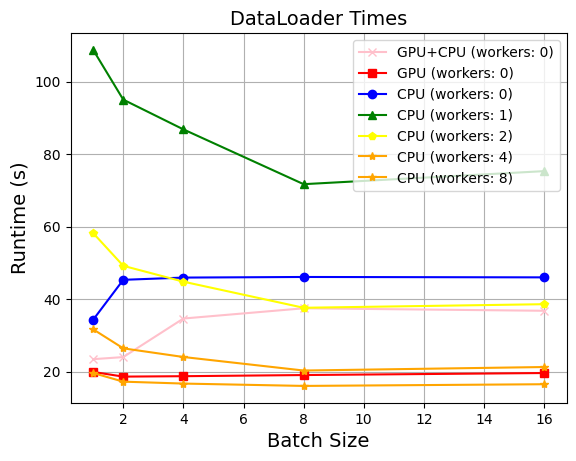

In [32]:
fig = plt.figure()
plt.plot(batch_sizes, results_gpu_cpu, color='pink', marker='x')
plt.plot(batch_sizes, results_gpu, color='red', marker='s')
plt.plot(batch_sizes, results_cpu[0], color='blue', marker='o')
plt.plot(batch_sizes, results_cpu[1], color='green', marker='^')
plt.plot(batch_sizes, results_cpu[2], color='yellow', marker='p')
plt.plot(batch_sizes, results_cpu[3], color='orange', marker='*')
plt.plot(batch_sizes, results_cpu[4][:5], color='orange', marker='*')
plt.title("DataLoader Times", fontsize=14)
plt.xlabel("Batch Size", fontsize=14)
plt.ylabel("Runtime (s)", fontsize=14)
plt.grid(True)
plt.legend(["GPU+CPU (workers: 0)", "GPU (workers: 0)", "CPU (workers: 0)", "CPU (workers: 1)", "CPU (workers: 2)", "CPU (workers: 4)", "CPU (workers: 8)"])
plt.show()

## Automatic Mixed Precision (AMP)

In [4]:
# Global Libraries
import collections
import gluoncv as gcv
from gluoncv.utils.metrics.segmentation import SegmentationMetric
from mxnet.gluon.data.vision import transforms
from gluoncv.loss import MixSoftmaxCrossEntropyLoss
from importlib import reload
import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import os
from sklearn import metrics
import time
from tqdm.notebook import tqdm

# Local Libraries
import pedestrian
import seg_model

# GPU mode
ctx = mx.gpu()

In [5]:
# Penn-Fudan Pedestrian Dataset
# https://www.cis.upenn.edu/~jshi/ped_html/
reload(pedestrian)

if not os.path.exists(pedestrian.PEDESTRIAN_FILE):
    !wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip

pedestrian_path = os.getcwd()

# Datasets
pedestrian_train_dataset = pedestrian.PedestrianDataset(
    pedestrian_path,
    split="train",
    is_segmentation_task=True,
    invert_masks=False)

pedestrian_val_dataset = pedestrian.PedestrianDataset(
    pedestrian_path,
    split="val",
    is_segmentation_task=True,
    invert_masks=False)

pedestrian_test_dataset = pedestrian.PedestrianDataset(
    pedestrian_path,
    split="test",
    is_segmentation_task=True,
    invert_masks=False)


# Further pre-processing
# Training pre-processing optimized for speed
# Evaluation pre-processing optimized for visualizations
image_size = 480

imagenet_transform = transforms.Compose([
    transforms.Resize(image_size, keep_ratio=True),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225]),
])

size_transform = transforms.Compose([
    transforms.Resize(image_size, keep_ratio=True),
    transforms.CenterCrop(image_size)
])

train_val_transform = lambda data, output: (imagenet_transform(data), size_transform(output))
test_transform = lambda data, output: (size_transform(data), mx.nd.moveaxis(size_transform(output), -1, 0))

p_train = pedestrian_train_dataset.transform(train_val_transform)
p_val   = pedestrian_val_dataset.transform(train_val_transform)
p_test  = pedestrian_test_dataset.transform(test_transform)

Read 120 images with 307 pedestrians
Read 25 images with 68 pedestrians
Read 25 images with 48 pedestrians


In [49]:
deeplab_pt = gcv.model_zoo.get_model('deeplab_resnet101_coco', pretrained=True, ctx=ctx)

In [54]:
print("Input data type:", p_val[0][0].dtype, "Model Parameters data type:", deeplab_pt.conv1[0].params["deeplabv337_resnetv1s_conv0_weight"].dtype)

Input data type: <class 'numpy.float32'> Model Parameters data type: <class 'numpy.float32'>


In [76]:
a = mx.nd.array([1/3], dtype=np.float32)
b = a.astype(np.float16)

print("1/3 as Float32: {0:.30f}".format(a.asscalar()))
print("1/3 as Float16: {0:.30f}".format(b.asscalar()))

1/3 as Float32: 0.333333343267440795898437500000
1/3 as Float16: 0.333251953125000000000000000000


### Float32 Training

In [6]:
# Model
deeplab_ft_direct_f32 = gcv.model_zoo.get_model('deeplab_resnet101_coco', pretrained=True, ctx=ctx)

# FT-Direct, no freezing layers
# # Freeze Layers (keeping track of the updated parameters)
# updated_params = []
# for param in deeplab_ft_direct_f32.collect_params().values():
#     if param.grad_req == "write":
#         param.grad_req = "null"
#         updated_params += [param.name]

# Replace the last layers
deeplab_ft_direct_f32.head = gcv.model_zoo.deeplabv3._DeepLabHead(2)
deeplab_ft_direct_f32.head.initialize(ctx=ctx)

# DeepLab v3 has an additional auxiliary output for training/loss
# Not required for our person detector
deeplab_ft_direct_f32.aux = False
for param in deeplab_ft_direct_f32.auxlayer.collect_params().values():
    if param.grad_req == "write":
        param.grad_req = "null"

deeplab_ft_direct_f32.hybridize(static_alloc=True, static_shape=True)

model_filename_ft_direct_f32 = "deeplab_resnet101_coco_ft_direct_f32.params"

reload(seg_model)

loss_fn = gcv.loss.SoftmaxCrossEntropyLoss()

# Epochs & Batch Size
epochs = 10
batch_size = 4

# Define Optimizer and Hyper Parameters
trainer = mx.gluon.Trainer(deeplab_ft_direct_f32.collect_params(), "sgd", {"learning_rate": 1.0})

start_time = time.time()

training_loss, validation_loss = seg_model.training_loop(
    deeplab_ft_direct_f32,
    loss_fn, 
    trainer, 
    epochs, 
    batch_size, 
    p_train, 
    p_val, 
    model_filename_ft_direct_f32, 
    ctx)

print("Training time for 10 epochs:", time.time() - start_time, "/ Best validation loss:", min(validation_loss))

[16:13:06] /work/mxnet/src/base.cc:79: cuDNN lib mismatch: linked-against version 8200 != compiled-against version 8201.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.


  0%|          | 0/10 [00:00<?, ?it/s]

[16:13:10] /work/mxnet/src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)


E:    1, TrL:      inf, VL: 1.052876 --- Updating saved model
E:    2, TrL: 0.742097, VL: 1.714529
E:    3, TrL: 0.702785, VL: 0.992210 --- Updating saved model
E:    4, TrL: 0.648438, VL: 0.822017 --- Updating saved model
E:    5, TrL: 0.593720, VL: 0.773931 --- Updating saved model
E:    6, TrL: 0.572978, VL: 1.156278
E:    7, TrL: 0.541276, VL: 0.680043 --- Updating saved model
E:    8, TrL: 0.534532, VL: 0.854894
E:    9, TrL: 0.511685, VL: 0.720281
E:   10, TrL: 0.483089, VL: 1.077385
Training time for 10 epochs: 594.4833037853241 / Best validation loss: 0.6800425


### Float16 Training

In [7]:
# Model
deeplab_ft_direct_f16 = gcv.model_zoo.get_model('deeplab_resnet101_coco', pretrained=True, ctx=ctx)

# FT-Direct, no freezing layers
# # Freeze Layers (keeping track of the updated parameters)
# updated_params = []
# for param in deeplab_ft_direct_f32.collect_params().values():
#     if param.grad_req == "write":
#         param.grad_req = "null"
#         updated_params += [param.name]

# Replace the last layers
deeplab_ft_direct_f16.head = gcv.model_zoo.deeplabv3._DeepLabHead(2)
deeplab_ft_direct_f16.head.initialize(ctx=ctx)

# Float16 model
deeplab_ft_direct_f16.cast('float16')

# DeepLab v3 has an additional auxiliary output for training/loss
# Not required for our person detector
deeplab_ft_direct_f16.aux = False
for param in deeplab_ft_direct_f16.auxlayer.collect_params().values():
    if param.grad_req == "write":
        param.grad_req = "null"

deeplab_ft_direct_f16.hybridize(static_alloc=True, static_shape=True)

model_filename_ft_direct_f16 = "deeplab_resnet101_coco_ft_direct_f16.params"

reload(seg_model)

loss_fn = gcv.loss.SoftmaxCrossEntropyLoss()

# Epochs & Batch Size
epochs = 10
batch_size = 4

# Define Optimizer and Hyper Parameters
trainer = mx.gluon.Trainer(deeplab_ft_direct_f16.collect_params(), "sgd", {
    "learning_rate": 1e-6, 
    "multi_precision": True
})

start_time = time.time()

training_loss, validation_loss = seg_model.training_loop(
    deeplab_ft_direct_f16,
    loss_fn, 
    trainer, 
    epochs, 
    batch_size, 
    p_train, 
    p_val, 
    model_filename_ft_direct_f16, 
    ctx,
    half_precision=True)

print("Training time for 10 epochs:", time.time() - start_time, "/ Best validation loss:", min(validation_loss))

  0%|          | 0/10 [00:00<?, ?it/s]

[16:25:09] /work/mxnet/src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)


E:    1, TrL:      nan, VL:      nan
E:    2, TrL:      nan, VL:      nan
E:    3, TrL:      nan, VL:      nan
E:    4, TrL:      nan, VL:      nan
E:    5, TrL:      nan, VL:      nan
E:    6, TrL:      nan, VL:      nan
E:    7, TrL:      nan, VL:      nan
E:    8, TrL:      nan, VL:      nan
E:    9, TrL:      nan, VL:      nan
E:   10, TrL:      nan, VL:      nan
Training time for 10 epochs: 199.80901980400085 / Best validation loss: nan


In [90]:
a = mx.nd.array([65519], dtype=np.float16)
b = mx.nd.array([65520], dtype=np.float16)

print("65519 as Float16: {0:.30f}".format(a.asscalar()))
print("65520 as Float16: {0:.30f}".format(b.asscalar()))

a = mx.nd.array([1e-7], dtype=np.float16)
b = mx.nd.array([1e-8], dtype=np.float16)

print("65519 as Float16: {0:.30f}".format(a.asscalar()))
print("65520 as Float16: {0:.30f}".format(b.asscalar()))

65519 as Float16: 65504.000000000000000000000000000000
65520 as Float16: inf
65519 as Float16: 0.000000119209289550781250000000
65520 as Float16: 0.000000000000000000000000000000


### Automatic Mixed Precision (AMP) Training

In [8]:
# AMP
amp.init()

# Model
deeplab_ft_direct_amp = gcv.model_zoo.get_model('deeplab_resnet101_coco', pretrained=True, ctx=ctx)

# FT-Direct, no freezing layers
# # Freeze Layers (keeping track of the updated parameters)
# updated_params = []
# for param in deeplab_ft_direct_f32.collect_params().values():
#     if param.grad_req == "write":
#         param.grad_req = "null"
#         updated_params += [param.name]

# Replace the last layers
deeplab_ft_direct_amp.head = gcv.model_zoo.deeplabv3._DeepLabHead(2)
deeplab_ft_direct_amp.head.initialize(ctx=ctx)

# DeepLab v3 has an additional auxiliary output for training/loss
# Not required for our person detector
deeplab_ft_direct_amp.aux = False
for param in deeplab_ft_direct_amp.auxlayer.collect_params().values():
    if param.grad_req == "write":
        param.grad_req = "null"

deeplab_ft_direct_amp.hybridize(static_alloc=True, static_shape=True)

model_filename_ft_direct_amp = "deeplab_resnet101_coco_ft_direct_amp.params"

reload(seg_model)

loss_fn = gcv.loss.SoftmaxCrossEntropyLoss()

# Epochs & Batch Size
epochs = 10
batch_size = 4

# Define Optimizer and Hyper Parameters
trainer = mx.gluon.Trainer(deeplab_ft_direct_amp.collect_params(), "sgd", {"learning_rate": 1.0})

start_time = time.time()

training_loss, validation_loss = seg_model.training_loop(
    deeplab_ft_direct_amp,
    loss_fn, 
    trainer, 
    epochs, 
    batch_size, 
    p_train, 
    p_val, 
    model_filename_ft_direct_amp, 
    ctx,
    amp_enabled=True)

print("Training time for 10 epochs:", time.time() - start_time, "/ Best validation loss:", min(validation_loss))

  0%|          | 0/10 [00:00<?, ?it/s]

E:    1, TrL:      inf, VL: 1.024292 --- Updating saved model
E:    2, TrL: 0.797540, VL: 1.140231
E:    3, TrL: 0.812618, VL: 0.979564 --- Updating saved model
E:    4, TrL: 0.743529, VL: 1.035632
E:    5, TrL: 0.687345, VL: 0.920520 --- Updating saved model
E:    6, TrL: 0.646200, VL: 2.283948
E:    7, TrL: 0.591441, VL: 0.914035 --- Updating saved model
E:    8, TrL: 0.551181, VL: 0.775137 --- Updating saved model
E:    9, TrL: 0.553194, VL: 0.784849
E:   10, TrL: 0.517108, VL: 0.708273 --- Updating saved model
Training time for 10 epochs: 217.64903020858765 / Best validation loss: 0.7082735


#### 2x BatchSize

In [14]:
# AMP
amp.init()

# Model
deeplab_ft_direct_amp = gcv.model_zoo.get_model('deeplab_resnet101_coco', pretrained=True, ctx=ctx)

# FT-Direct, no freezing layers
# # Freeze Layers (keeping track of the updated parameters)
# updated_params = []
# for param in deeplab_ft_direct_f32.collect_params().values():
#     if param.grad_req == "write":
#         param.grad_req = "null"
#         updated_params += [param.name]

# Replace the last layers
deeplab_ft_direct_amp.head = gcv.model_zoo.deeplabv3._DeepLabHead(2)
deeplab_ft_direct_amp.head.initialize(ctx=ctx)

# DeepLab v3 has an additional auxiliary output for training/loss
# Not required for our person detector
deeplab_ft_direct_amp.aux = False
for param in deeplab_ft_direct_amp.auxlayer.collect_params().values():
    if param.grad_req == "write":
        param.grad_req = "null"

deeplab_ft_direct_amp.hybridize(static_alloc=True, static_shape=True)

model_filename_ft_direct_amp = "deeplab_resnet101_coco_ft_direct_amp.params"

reload(seg_model)

loss_fn = gcv.loss.SoftmaxCrossEntropyLoss()

# Epochs & Batch Size
epochs = 10
batch_size = 8

# Define Optimizer and Hyper Parameters
trainer = mx.gluon.Trainer(deeplab_ft_direct_amp.collect_params(), "sgd", {"learning_rate": 1.0})

start_time = time.time()

training_loss, validation_loss = seg_model.training_loop(
    deeplab_ft_direct_amp,
    loss_fn, 
    trainer, 
    epochs, 
    batch_size, 
    p_train, 
    p_val, 
    model_filename_ft_direct_amp, 
    ctx,
    amp_enabled=True)

print("Training time for 10 epochs:", time.time() - start_time, "/ Best validation loss:", min(validation_loss))

  0%|          | 0/10 [00:00<?, ?it/s]

E:    1, TrL: 0.389132, VL: 0.303815 --- Updating saved model
E:    2, TrL: 0.186275, VL: 0.257895 --- Updating saved model
E:    3, TrL: 0.134914, VL: 0.210688 --- Updating saved model
E:    4, TrL: 0.109792, VL: 0.223997
E:    5, TrL: 0.095182, VL: 0.219189
E:    6, TrL: 0.085338, VL: 0.195552 --- Updating saved model
E:    7, TrL: 0.077981, VL: 0.181985 --- Updating saved model
E:    8, TrL: 0.073843, VL: 0.193172
E:    9, TrL: 0.068550, VL: 0.201830
E:   10, TrL: 0.065619, VL: 0.192543
Training time for 10 epochs: 218.82141995429993 / Best validation loss: 0.18198483


#### 2x Batchsize + 3x epochs

In [91]:
# AMP
amp.init()

# Model
deeplab_ft_direct_amp = gcv.model_zoo.get_model('deeplab_resnet101_coco', pretrained=True, ctx=ctx)

# FT-Direct, no freezing layers
# # Freeze Layers (keeping track of the updated parameters)
# updated_params = []
# for param in deeplab_ft_direct_f32.collect_params().values():
#     if param.grad_req == "write":
#         param.grad_req = "null"
#         updated_params += [param.name]

# Replace the last layers
deeplab_ft_direct_amp.head = gcv.model_zoo.deeplabv3._DeepLabHead(2)
deeplab_ft_direct_amp.head.initialize(ctx=ctx)

# DeepLab v3 has an additional auxiliary output for training/loss
# Not required for our person detector
deeplab_ft_direct_amp.aux = False
for param in deeplab_ft_direct_amp.auxlayer.collect_params().values():
    if param.grad_req == "write":
        param.grad_req = "null"

deeplab_ft_direct_amp.hybridize(static_alloc=True, static_shape=True)

model_filename_ft_direct_amp = "deeplab_resnet101_coco_ft_direct_amp.params"

reload(seg_model)

loss_fn = gcv.loss.SoftmaxCrossEntropyLoss()

# Epochs & Batch Size
epochs = 30
batch_size = 8

# Define Optimizer and Hyper Parameters
trainer = mx.gluon.Trainer(deeplab_ft_direct_amp.collect_params(), "sgd", {"learning_rate": 1.0})

start_time = time.time()

training_loss, validation_loss = seg_model.training_loop(
    deeplab_ft_direct_amp,
    loss_fn, 
    trainer, 
    epochs, 
    batch_size, 
    p_train, 
    p_val, 
    model_filename_ft_direct_amp, 
    ctx,
    amp_enabled=True)

print("Training time for 10 epochs:", time.time() - start_time, "/ Best validation loss:", min(validation_loss))

  0%|          | 0/30 [00:00<?, ?it/s]

E:    1, TrL: 0.402396, VL: 0.277328 --- Updating saved model
E:    2, TrL: 0.183476, VL: 0.250136 --- Updating saved model
E:    3, TrL: 0.135281, VL: 0.200705 --- Updating saved model
E:    4, TrL: 0.108729, VL: 0.218331
E:    5, TrL: 0.096049, VL: 0.197262 --- Updating saved model
E:    6, TrL: 0.087256, VL: 0.193183 --- Updating saved model
E:    7, TrL: 0.078887, VL: 0.168608 --- Updating saved model
E:    8, TrL: 0.073169, VL: 0.182085
E:    9, TrL: 0.067686, VL: 0.194122
E:   10, TrL: 0.065026, VL: 0.184833
E:   11, TrL: 0.061416, VL: 0.164398 --- Updating saved model
E:   12, TrL: 0.060552, VL: 0.179351
E:   13, TrL: 0.059573, VL: 0.174664
E:   14, TrL: 0.055687, VL: 0.213759
E:   15, TrL: 0.054580, VL: 0.172833
E:   16, TrL: 0.052671, VL: 0.178162
E:   17, TrL: 0.051071, VL: 0.169275
E:   18, TrL: 0.049306, VL: 0.201066
E:   19, TrL: 0.048858, VL: 0.183281
E:   20, TrL: 0.047757, VL: 0.223146
E:   21, TrL: 0.046628, VL: 0.191476
E:   22, TrL: 0.045585, VL: 0.194995
E:   23, Tr

### Multi-GPU Training

In [6]:
# Context variable is now a list,
# with each element corresponding to a GPU device
ctx_list = [mx.gpu(0)]

In [7]:
# Model
deeplab_ft_direct_f32 = gcv.model_zoo.get_model('deeplab_resnet101_coco', pretrained=True, ctx=ctx_list)

# FT-Direct, no freezing layers
# # Freeze Layers (keeping track of the updated parameters)
# updated_params = []
# for param in deeplab_ft_direct_f32.collect_params().values():
#     if param.grad_req == "write":
#         param.grad_req = "null"
#         updated_params += [param.name]

# Replace the last layers
deeplab_ft_direct_f32.head = gcv.model_zoo.deeplabv3._DeepLabHead(2)
deeplab_ft_direct_f32.head.initialize(ctx=ctx_list)

# DeepLab v3 has an additional auxiliary output for training/loss
# Not required for our person detector
deeplab_ft_direct_f32.aux = False
for param in deeplab_ft_direct_f32.auxlayer.collect_params().values():
    if param.grad_req == "write":
        param.grad_req = "null"

deeplab_ft_direct_f32.hybridize(static_alloc=True, static_shape=True)

model_filename_ft_direct_f32 = "deeplab_resnet101_coco_ft_direct_f32.params"

reload(seg_model)

loss_fn = gcv.loss.SoftmaxCrossEntropyLoss()

# Epochs & Batch Size
epochs = 10
batch_size = 4

# Define Optimizer and Hyper Parameters
trainer = mx.gluon.Trainer(deeplab_ft_direct_f32.collect_params(), "sgd", {"learning_rate": 0.1})

start_time = time.time()

training_loss, validation_loss = seg_model.multi_training_loop(
    deeplab_ft_direct_f32,
    loss_fn, 
    trainer, 
    epochs, 
    batch_size, 
    p_train, 
    p_val, 
    model_filename_ft_direct_f32, 
    ctx_list)

print("Training time for 10 epochs:", time.time() - start_time, "/ Best validation loss:", min(validation_loss))

/home/ext_andres_pereztorres_oxbotica_/.local/lib/python3.9/site-packages/mxnet/gluon/block.py:825: UserWarning: Parameter deeplabv30__fcnhead0_hybridsequential0_batchnorm0_running_mean, deeplabv30__fcnhead0_hybridsequential0_conv0_weight, deeplabv30__fcnhead0_hybridsequential0_conv1_weight, deeplabv30__fcnhead0_hybridsequential0_conv1_bias, deeplabv30__fcnhead0_hybridsequential0_batchnorm0_running_var, deeplabv30__fcnhead0_hybridsequential0_batchnorm0_gamma, deeplabv30__fcnhead0_hybridsequential0_batchnorm0_beta is not used by any computation. Is this intended?
  out = self.forward(*args)


E:    1, TrL: 1.057983, VL: 0.220516 --- Updating saved model
E:    2, TrL: 0.503621, VL: 0.158298 --- Updating saved model
E:    3, TrL: 0.393605, VL: 0.123313 --- Updating saved model
E:    4, TrL: 0.308222, VL: 0.141282
E:    5, TrL: 0.267527, VL: 0.107261 --- Updating saved model
E:    6, TrL: 0.248439, VL: 0.099912 --- Updating saved model
E:    7, TrL: 0.221087, VL: 0.099837 --- Updating saved model
E:    8, TrL: 0.201491, VL: 0.107823
E:    9, TrL: 0.191541, VL: 0.106381
E:   10, TrL: 0.182945, VL: 0.093767 --- Updating saved model
Training time for 10 epochs: 647.753002166748 / Best validation loss: 0.0937674343585968


In [8]:
# Context variable is now a list,
# with each element corresponding to a GPU device
ctx_list = [mx.gpu(0), mx.gpu(1), mx.gpu(2), mx.gpu(3)]
num_gpus = len(ctx_list)

In [9]:
# Model
deeplab_ft_direct_f32 = gcv.model_zoo.get_model('deeplab_resnet101_coco', pretrained=True, ctx=ctx_list)

# FT-Direct, no freezing layers
# # Freeze Layers (keeping track of the updated parameters)
# updated_params = []
# for param in deeplab_ft_direct_f32.collect_params().values():
#     if param.grad_req == "write":
#         param.grad_req = "null"
#         updated_params += [param.name]

# Replace the last layers
deeplab_ft_direct_f32.head = gcv.model_zoo.deeplabv3._DeepLabHead(2)
deeplab_ft_direct_f32.head.initialize(ctx=ctx_list)

# DeepLab v3 has an additional auxiliary output for training/loss
# Not required for our person detector
deeplab_ft_direct_f32.aux = False
for param in deeplab_ft_direct_f32.auxlayer.collect_params().values():
    if param.grad_req == "write":
        param.grad_req = "null"

deeplab_ft_direct_f32.hybridize(static_alloc=True, static_shape=True)

model_filename_ft_direct_f32 = "deeplab_resnet101_coco_ft_direct_f32.params"

reload(seg_model)

loss_fn = gcv.loss.SoftmaxCrossEntropyLoss()

# Epochs & Batch Size
epochs = 10
batch_size_per_gpu = 4
batch_size = len(ctx_list) * batch_size_per_gpu

# Define Optimizer and Hyper Parameters
trainer = mx.gluon.Trainer(deeplab_ft_direct_f32.collect_params(), "sgd", {"learning_rate": 0.5})

start_time = time.time()

training_loss, validation_loss = seg_model.multi_training_loop(
    deeplab_ft_direct_f32,
    loss_fn, 
    trainer, 
    epochs, 
    batch_size, 
    p_train, 
    p_val, 
    model_filename_ft_direct_f32, 
    ctx_list)

print("Training time for 10 epochs:", time.time() - start_time, "/ Best validation loss:", min(validation_loss))

/home/ext_andres_pereztorres_oxbotica_/.local/lib/python3.9/site-packages/mxnet/gluon/block.py:825: UserWarning: Parameter deeplabv31__fcnhead0_hybridsequential0_conv0_weight, deeplabv31__fcnhead0_hybridsequential0_conv1_bias, deeplabv31__fcnhead0_hybridsequential0_batchnorm0_running_mean, deeplabv31__fcnhead0_hybridsequential0_batchnorm0_gamma, deeplabv31__fcnhead0_hybridsequential0_batchnorm0_beta, deeplabv31__fcnhead0_hybridsequential0_conv1_weight, deeplabv31__fcnhead0_hybridsequential0_batchnorm0_running_var is not used by any computation. Is this intended?
  out = self.forward(*args)


E:    1, TrL: 4.510626, VL: 0.330724 --- Updating saved model
E:    2, TrL: 2.277204, VL: 0.408388
E:    3, TrL: 1.589747, VL: 0.156678 --- Updating saved model
E:    4, TrL: 1.382671, VL: 0.313606
E:    5, TrL: 1.031660, VL: 0.131599 --- Updating saved model
E:    6, TrL: 1.122431, VL: 0.185414
E:    7, TrL: 0.862841, VL: 0.091557 --- Updating saved model
E:    8, TrL: 0.932939, VL: 0.195323
E:    9, TrL: 0.740517, VL: 0.165574
E:   10, TrL: 0.920897, VL: 0.082047 --- Updating saved model
Training time for 10 epochs: 177.23532104492188 / Best validation loss: 0.082047363743186
